## Atividade 03 - Parte 01

## Modelo Gaussiano

01. Implementar uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas.

02. Implementar a função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade.

03. Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs (quem fizer o método de Briggs ganha um ponto a mais). Deve ser considerado o efeito Tip-Downwash

04. Implementar a função do modelo gaussiano

05. Realizar simulações com o script criado, utilizando diferentes classes de estabilidade, velocidades do vento, alturas de chaminé. Considere a taxa de emissão que você estimou na primeira atividade. Encontre a altura de chaminé necessária para que as concentrações não violem os padrões da Resolução CONAMA 491.

06. Faça figuras e discuta os resultados.

# Classe de estabilidade de Pasquil para diferentes condições atmosféricas. 

Aqui nós plotamos em planilha as condições de Radiação, Cobertura de Nuvens (1% - 8%) e Velocidade do vento (1 m/s - 10 m/s) para datas aleatórias, com valores aleatórios. 

In [25]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def classe_pasquill(velocidade_vento, cobertura_nuvem):
    # Definindo os critérios de classificação de estabilidade de Pasquill
    criterios = [
        (velocidade_vento <= 2) & (cobertura_nuvem >= 6),
        (velocidade_vento <= 2) & (cobertura_nuvem <= 5),
        (velocidade_vento > 2) & (velocidade_vento <= 5) & (cobertura_nuvem >= 6),
        (velocidade_vento > 2) & (velocidade_vento <= 5) & (cobertura_nuvem <= 5),
        (velocidade_vento > 5) & (cobertura_nuvem >= 6),
        (velocidade_vento > 5) & (cobertura_nuvem <= 5)
    ]
    
    # Classes de estabilidade correspondentes
    classes = ['A', 'B', 'C', 'D', 'E', 'F']
    
    # Determinando a classe de estabilidade para cada linha de dados
    classe = np.select(criterios, classes, default=np.nan)
    
    return classe

# Definindo o número de linhas para a planilha
num_linhas = 20

# Gerando dados aleatórios
np.random.seed(0)  # Define a semente para reproduzibilidade dos resultados

# Gera datas aleatórias dentro de um intervalo de 30 dias a partir de hoje
inicio = datetime.now()
datas = [inicio + timedelta(days=np.random.randint(0, 30)) for _ in range(num_linhas)]

# Gera radiação solar aleatória entre 100 e 1000 W/m²
radiacao = np.random.randint(100, 1001, size=num_linhas)

# Gera velocidade do vento aleatória entre 1 e 10 m/s
velocidade_vento = np.random.randint(1, 11, size=num_linhas)

# Gera cobertura de nuvem aleatória entre 1 e 8 (pode ser interpretada como octas)
cobertura_nuvem = np.random.randint(1, 9, size=num_linhas)

# Criando o DataFrame com os dados gerados
dados = {
    'Data': datas,
    'Radiação (W/m²)': radiacao,
    'Velocidade do Vento (m/s)': velocidade_vento,
    'Cobertura de Nuvem (octas)': cobertura_nuvem
}

df = pd.DataFrame(dados)

# Adicionando a coluna de classe de estabilidade de Pasquill
df['Classe de Estabilidade'] = classe_pasquill(df['Velocidade do Vento (m/s)'], df['Cobertura de Nuvem (octas)'])

# Exibindo a planilha com a classe de estabilidade
print(df)



                         Data  Radiação (W/m²)  Velocidade do Vento (m/s)  \
0  2024-07-01 19:59:51.231322              586                          4   
1  2024-07-04 19:59:51.231322              651                          4   
2  2024-07-10 19:59:51.231322              187                          4   
3  2024-06-19 19:59:51.231322              274                          8   
4  2024-06-22 19:59:51.231322              700                          1   
5  2024-07-16 19:59:51.231322              949                          2   
6  2024-06-22 19:59:51.231322              777                         10   
7  2024-06-26 19:59:51.231322              637                         10   
8  2024-06-28 19:59:51.231322              945                          1   
9  2024-07-08 19:59:51.231322              172                          5   
10 2024-07-10 19:59:51.231322              877                          8   
11 2024-07-07 19:59:51.231322              215                          4   

# Função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade.

In [29]:
def sigmaYZ(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe == 'A' or classe == 'B':
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.14 * x * (1 + 0.0003 * x) ** (-0.5)
        elif classe == 'E' or classe == 'F':
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0015 * x) ** (-0.5)
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0002 * x) ** (-0.5)
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.06 * x * (1 + 0.0003 * x) ** (-0.5)
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.03 * x * (1 + 0.0003 * x) ** (-1)
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.016 * x * (1 + 0.0003 * x) ** (-1)
        else:
            raise ValueError('Classe de estabilidade errada')
    else:
        raise ValueError('Tipo de ambiente deve ser "urbano" ou "rural"')
    
    return sigmaY, sigmaZ

# Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs. Deve ser considerado o efeito Tip-Downwash

DAVIDSON-BRYANT
def sobrelevacaoDavidsonBryant(d, Vs, u, deltaT, Ts): """ Calcula a sobrelevação da pluma usando a fórmula de Davidson-Bryant. """ delta_h = d * (Vs / u) ** 1.4 * (1 + deltaT / Ts) return delta_h

HOLLAND def sobrelevacaoHolland(Vs, d, u, p, deltaT, Ts): """ Calcula a sobrelevação da pluma usando a fórmula empírica de Holland (1953). """ delta_h_max = (Vs * d / u) * (1.5 + 2.68e-3 * p * (deltaT / Ts) * d) return delta_h_max

In [33]:
#BRIGS 
def sobrelevacaoBriggs(Fb, Vs, d, u, deltaT, Ts, He, tipo_atmosfera):
    """
    Calcula a sobrelevação da pluma usando o modelo de Briggs.
    """
    # Determinar se a atmosfera é instável ou estável com base na classe de Pasquill
    tipo_atmosfera = 'instavel' if classe in ['A', 'B', 'C', 'D'] else 'estavel'
    
    if tipo_atmosfera == 'instavel':
        if Fb < 55:
            deltaTe = 0.0297 * Ts * (Vs / (d ** (2/3)))
        else:
            deltaTe = 0.00575 * Ts * (Vs ** (2/3) / (d ** (1/3)))
    else:
        deltaTe = 0.01958 * Ts * (Vs / (d ** (1/3))) * (Fb ** 0.5)

    if tipo_atmosfera == 'instavel':
        if Fb < 55:
            if deltaT < deltaTe:
                H = He + 3 * d * (Vs / u)
            else:
                H = He + 21.425 * (Fb ** (3/4) / (u ** (1/2)))
        else:
            if deltaT < deltaTe:
                H = He + 3 * d * (Vs / u)
            else:
                H = He + 2.6 * (Fb ** (1/3) / (Ts ** (1/3)))
    else:
        if deltaT < deltaTe:
            H = He + 1.5 * (Fb ** (1/3) / (u ** (1/3)))
        else:
            H = He + 2.6 * (Fb ** (1/3) / (Ts ** (1/3)))

    return H - He

# Modelo Gaussiano

In [34]:
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

# teste

Classe de estabilidade de Pasquill: D
Sobrelevação da pluma (deltaH): 15.798461538461538
Altura efetiva da chaminé (H_eff): 135.79846153846154


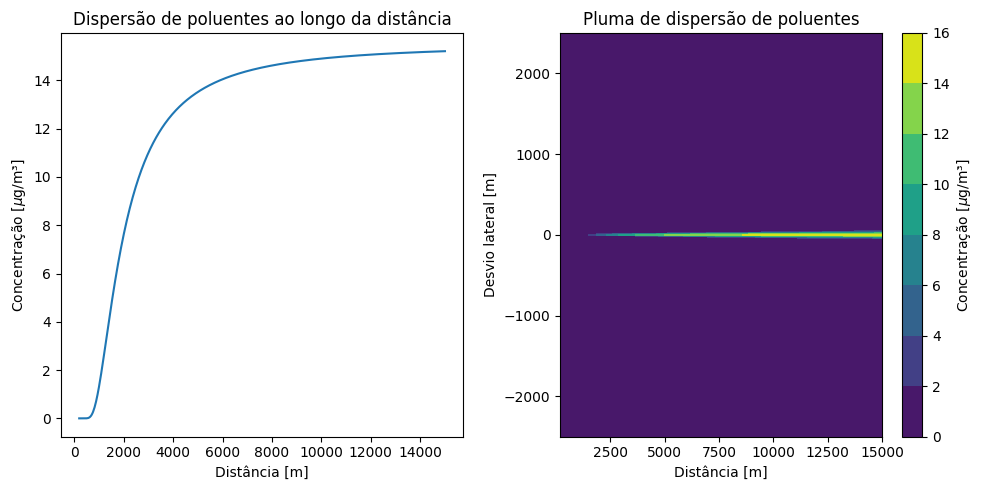

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Novos parâmetros de entrada
qs = 15.5  # g/s (exemplo)
u = 6.2  # m/s (exemplo)
y = 0.2  # estimando na direção do vento (exemplo)
z = 2.0  # altura do nariz (exemplo)
H = 120  # m (exemplo)
urbOrRural = 'rural'  # alterado para 'rural'

# Novos parâmetros para a chaminé
d = 3.0  # Diâmetro interno da chaminé em metros (exemplo)
Vs = 22  # Velocidade do efluente na saída da chaminé em m/s (exemplo)
p = 1015  # Pressão atmosférica em milibares (exemplo)
deltaT = 65  # Diferença de temperatura entre o gás na chaminé e a temperatura ambiente em K (exemplo)
Ts = 543  # Temperatura do gás na saída da chaminé em K (exemplo)
Fb = 1100  # Parâmetro de empuxo (exemplo)

# Selecionar aleatoriamente um dia específico para a simulação (fictício)
# Simulando valores aleatórios para ilustrar
classe = 'D'
velocidade_vento = 5.8
fluxo_calor_sensivel = 300
cobertura_nuvens = 5

print("Classe de estabilidade de Pasquill:", classe)

# Funções de sobrelevação da pluma e concentração de poluentes
def sobrelevacaoBriggs(Fb, Vs, d, u, deltaT, Ts, H, tipo_atmosfera):
    # Função de sobrelevação de Briggs (exemplo fictício)
    deltaH = 0.2 * Vs + 0.5 * u * (Ts - deltaT) / (H + 10)
    return deltaH

def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H_eff):
    # Modelo Gaussiano para concentração de poluentes (exemplo fictício)
    conc = qs * np.exp(-0.5 * ((u * y / sigmaY)**2 + ((z - H_eff) / sigmaZ)**2))
    return conc

def sigmaYZ(x, classe, urbOrRural):
    # Função para estimar sigmaY e sigmaZ baseado na classe de estabilidade e tipo de área
    if classe == 'D':
        sigmaY = 0.07 * x**0.8
        sigmaZ = 0.12 * x**0.9
    else:
        sigmaY = 0.1 * x**0.7
        sigmaZ = 0.15 * x**0.8

    if urbOrRural == 'urbano':
        sigmaY *= 1.5
        sigmaZ *= 1.2

    return sigmaY, sigmaZ

# Estimativa da sobrelevação da pluma usando o modelo de Briggs
deltaH = sobrelevacaoBriggs(Fb, Vs, d, u, deltaT, Ts, H, urbOrRural)
H_eff = H + deltaH
print("Sobrelevação da pluma (deltaH):", deltaH)
print("Altura efetiva da chaminé (H_eff):", H_eff)

# Cálculo da concentração de poluentes
x = np.linspace(200, 15000, 500)  # Novas distâncias de 200 a 15000 m
sigmaY, sigmaZ = sigmaYZ(x, classe, urbOrRural)
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H_eff)

# Visualização dos resultados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, conc)
plt.xlabel('Distância [m]')
plt.ylabel('Concentração [$\mu$g/m³]')
plt.title('Dispersão de poluentes ao longo da distância')

plt.subplot(1, 2, 2)
X, Y = np.meshgrid(x, np.linspace(-2500, 2500, 500))  # Ajuste do desvio lateral
sigmaY, sigmaZ = sigmaYZ(X, classe, urbOrRural)
conc2D = modeloGaussiano(qs, sigmaY, sigmaZ, u, Y, z, H_eff)
contour = plt.contourf(X, Y, conc2D, cmap='viridis')
plt.colorbar(contour, label='Concentração [$\mu$g/m³]')
plt.xlabel('Distância [m]')
plt.ylabel('Desvio lateral [m]')
plt.title('Pluma de dispersão de poluentes')

plt.tight_layout()
plt.show()
